Plot BB code lattice logical error rates combined noise (fusion error and erasure) phase space.
Combining grid sweep with constant polar angle sweeps in a Voronoi tesselation to show all collected data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

Import linearised noise data:

In [2]:
x_list = []
y_list = []
angle_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
n72_err_rate_list = []
n90_err_rate_list = []
n108_err_rate_list = []
n144_err_rate_list = []
for angle in angle_list:

    n72_data = []
    n90_data = []
    n108_data = []
    n144_data = []
    folder_path = f"bb_data_20points/angle {angle}"

    theta = angle * np.pi/2

    # Get all text files in the folder
    files = sorted(f for f in os.listdir(folder_path) if f.endswith(".txt"))

    for file in files:
        file_path = os.path.join(folder_path, file)
        data = np.loadtxt(file_path).astype(int)  
        if len(data) >= 4:  # Ensure there are at least 4 values
            n72_data.append(data[0])
            n90_data.append(data[1])
            n108_data.append(data[2])
            n144_data.append(data[3])

    tot_num_trials = 100000
    n72_err_rate = [sum(elements)/tot_num_trials for elements in zip(*n72_data)]
    n90_err_rate = [sum(elements)/tot_num_trials for elements in zip(*n90_data)]
    n108_err_rate = [sum(elements)/tot_num_trials for elements in zip(*n108_data)]
    n144_err_rate = [sum(elements)/tot_num_trials for elements in zip(*n144_data)]
    
    n72_err_rate_list.append(n72_err_rate)
    n90_err_rate_list.append(n90_err_rate)
    n108_err_rate_list.append(n108_err_rate)
    n144_err_rate_list.append(n144_err_rate)

    l_err_rates = [n72_err_rate,n90_err_rate,n108_err_rate,n144_err_rate]
    
    min_err, max_err = 0.00005, 0.003
    min_loss, max_loss = 0.01, 0.1

    e_0 = (max_err - min_err) * np.cos(theta)
    l_0 = (max_loss - min_loss) * np.sin(theta)

    x1 = np.linspace(0,1,20) 

    # given noise rate, what is corresponding p_err and p_erase?
    def get_err_and_erase(x,angle):
        theta = angle*np.pi/2
        p_err = (x*(max_err-min_err)+min_err)*np.cos(theta)
        p_erase = (x*(max_loss-min_loss)+min_loss)*np.sin(theta)
        return p_err, p_erase
    coords_theta = []
    for x in x1:
        coords_theta.append(get_err_and_erase(x,angle))
    coords_theta = np.array(coords_theta)
    
    x_list.append(coords_theta[:,0])
    y_list.append(coords_theta[:,1])
n72_err_rate_list = np.array(n72_err_rate_list)
n90_err_rate_list = np.array(n90_err_rate_list)
n108_err_rate_list = np.array(n108_err_rate_list)
n144_err_rate_list = np.array(n144_err_rate_list)

Import phase space grid data:

In [3]:
n72_data_grid = []
n90_data_grid = []
n108_data_grid = []
n144_data_grid = []

id_list_grid = range(1,1001)

for id in id_list_grid:
    n72_data_grid.append(np.loadtxt(f"2d_grid_data/l_errs_72code_{id}.txt").astype(int))
    n90_data_grid.append(np.loadtxt(f"2d_grid_data/l_errs_90code_{id}.txt").astype(int))
    n108_data_grid.append(np.loadtxt(f"2d_grid_data/l_errs_108code_{id}.txt").astype(int))
    n144_data_grid.append(np.loadtxt(f"2d_grid_data/l_errs_144code_{id}.txt").astype(int))

tot_num_trials = 100000
n72_err_rate_grid = [sum(elements)/tot_num_trials for elements in zip(*n72_data_grid)]
n90_err_rate_grid = [sum(elements)/tot_num_trials for elements in zip(*n90_data_grid)]
n108_err_rate_grid = [sum(elements)/tot_num_trials for elements in zip(*n108_data_grid)]
n144_err_rate_grid = [sum(elements)/tot_num_trials for elements in zip(*n144_data_grid)]

err_rates_grid = [n72_err_rate_grid, n90_err_rate_grid, n108_err_rate_grid, n144_err_rate_grid]
err_rates_grid = np.array(err_rates_grid)

Get coordinates and plot:

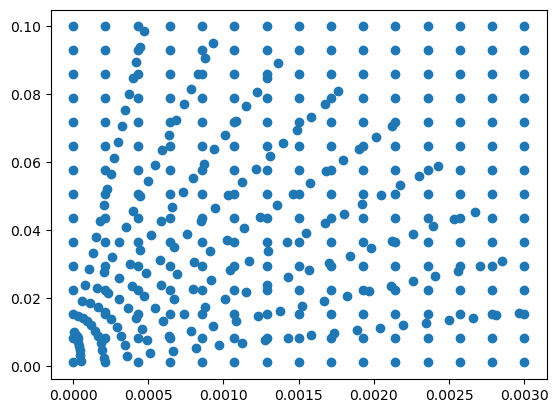

In [4]:
min_err_grid, max_err_grid = 0.000001, 0.003 # these have been fixed from simulations
min_loss_grid, max_loss_grid = 0.001, 0.1

p_err_list_grid = np.linspace(min_err_grid,max_err_grid,15)
p_erasure_list_grid = np.linspace(min_loss_grid,max_loss_grid,15)

mesh_p, mesh_e = np.meshgrid(p_err_list_grid, p_erasure_list_grid, indexing='ij')

coords_2d = np.array([mesh_p.reshape(mesh_p.shape[0]*mesh_p.shape[1]), mesh_e.reshape(mesh_e.shape[0]*mesh_e.shape[1])]).T

x_list = np.array(x_list)
y_list = np.array(y_list)

coords_lines = np.array([x_list.reshape(x_list.shape[0]*x_list.shape[1]),y_list.reshape(y_list.shape[0]*y_list.shape[1])]).T

coords = np.vstack([coords_2d, coords_lines])

plt.scatter(coords.T[0], coords.T[1])

Scale the axes such that we have a unit grid, for the Voronoi tessellation:

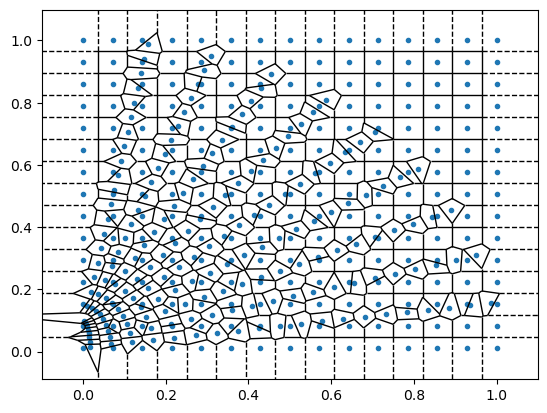

In [5]:
# grid scale

min_err_grid, max_err_grid = 0.000001, 0.003 
min_loss_grid, max_loss_grid = 0.001, 0.1

p_err_list_grid = np.linspace(min_err_grid,max_err_grid,15)
p_erasure_list_grid = np.linspace(min_loss_grid,max_loss_grid,15)

# lines scale
min_err_lines, min_loss_lines = 0,0 # max-ed by the grid 

new_coords = coords.copy()
new_coords.T[0]=new_coords.T[0]/max_err_grid
new_coords.T[1]=new_coords.T[1]/max_loss_grid
new_coords

from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(new_coords)
fig = voronoi_plot_2d(vor, show_vertices=False,show_points=True,incremental=True)
plt.show()

In [6]:
# assign each coordinate with its corresponding logical error rate

zdata = ((err_rates_grid[0] >= 10**-5) * err_rates_grid[0]) 
new_zdata = np.array(zdata.reshape(zdata.shape[0]*zdata.shape[1])).T

new_lines_data = (np.array([n72_err_rate_list.reshape(n72_err_rate_list.shape[0]*n72_err_rate_list.shape[1])]).T).reshape(-1)

new_zdata_all = np.hstack([new_zdata, new_lines_data])

C:\Users\wg22320\AppData\Local\Temp\ipykernel_21740\2747371741.py:34: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mapper)


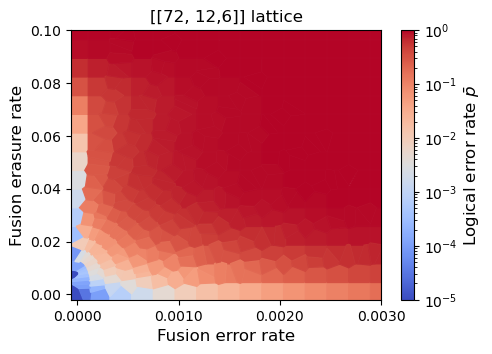

In [7]:
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import LogNorm

new_zdata_all_no_zero = [10**-5 if x == 0 else x for x in new_zdata_all]
norm = LogNorm(vmin=1e-5, vmax=1)  # Set vmin and vmax to reflect the data range
mapper = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)


# add 4 distant dummy points
points = np.append(new_coords, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
vor = Voronoi(points)

fig, ax = plt.subplots(figsize=(5,3.5))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False,show_edges=False,
                line_colors="white", line_width=0.1,line_alpha=0.1)

for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(new_zdata_all_no_zero[r]))
        
tick_positions = np.linspace(0, 1, num=4)
tick_positions_y = np.linspace(0, 1, num=6)

plt.xticks(tick_positions, labels=[f'{x*max_err_grid:.4f}' for x in tick_positions])  
plt.yticks(tick_positions_y, labels=[f'{y*max_loss_grid:.2f}' for y in tick_positions_y])
        
plt.xlim(-0.02,1)
plt.ylim(-0.02,1)


cbar = plt.colorbar(mapper)
cbar.set_ticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])  # Set tick positions for log scale
cbar.set_ticklabels([r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'], fontsize=10)
cbar.set_label(r'Logical error rate $\bar{p}$',fontsize=12)


ax.set_xlabel('Fusion error rate',fontsize=12)
ax.set_ylabel('Fusion erasure rate',fontsize=12)
ax.set_title(f"[[72, 12,6]] lattice",fontsize=12)
plt.show()
# plt.savefig("colourplot72.png", dpi=100)

Pseudo-thresholds

In [8]:
# copied over from Get BB lattice error rates notebook
pt_72 = [0.483,0.374,0.287,0.241,0.212,0.202,0.200,0.211,0.243,0.366,0.786]
pt_90 = [0.519,0.344,0.255,0.201,0.173,0.159,0.151,0.155,0.170,0.211,0.823]
pt_108 = [0.579,0.377,0.270,0.215,0.182,0.164,0.155,0.155,0.169,0.206,0.837]
pt_144 = [0.597,0.391,0.280,0.222,0.188,0.168,0.159,0.159,0.170,0.203,0.855]

# given noise rate, what is corresponding p_err and p_erase?

min_err, max_err = 0.00005, 0.003 # these have been fixed from simulations
min_loss, max_loss = 0.01, 0.1

def get_err_and_erase(x,angle):
    theta = angle*np.pi/2
    p_err = (x*(max_err-min_err)+min_err)*np.cos(theta)
    p_erase = (x*(max_loss-min_loss)+min_loss)*np.sin(theta)
    return p_err, p_erase

angles = np.arange(0, 1.1, 0.1)
pt_noise_72 = []
pt_noise_90 = []
pt_noise_108 = []
pt_noise_144 = []
for i in range(len(pt_72)):
    pt_noise_72.append(get_err_and_erase(pt_72[i],angles[i]))
    pt_noise_90.append(get_err_and_erase(pt_90[i],angles[i]))
    pt_noise_108.append(get_err_and_erase(pt_108[i],angles[i]))
    pt_noise_144.append(get_err_and_erase(pt_144[i],angles[i]))

pt_noise = [pt_noise_72,pt_noise_90,pt_noise_108,pt_noise_144]

In [9]:
# scale these 
pt_noise_scaled = []
for pt_lattice in pt_noise:
    pt_lattice_new = np.array(pt_lattice.copy())
    pt_lattice_new.T[0]=pt_lattice_new.T[0]/max_err_grid
    pt_lattice_new.T[1]=pt_lattice_new.T[1]/max_loss_grid
    pt_noise_scaled.append(pt_lattice_new)

C:\Users\wg22320\AppData\Local\Temp\ipykernel_21740\3296681981.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mapper)


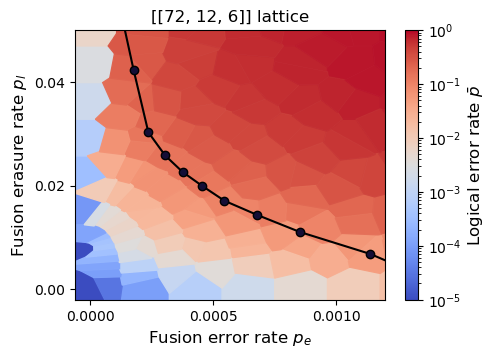

In [10]:
zdata = ((err_rates_grid[0] >= 10**-5) * err_rates_grid[0]) 
new_zdata = np.array(zdata.reshape(zdata.shape[0]*zdata.shape[1])).T

new_lines_data = (np.array([n72_err_rate_list.reshape(n72_err_rate_list.shape[0]*n72_err_rate_list.shape[1])]).T).reshape(-1)

new_zdata_all = np.hstack([new_zdata, new_lines_data])

new_zdata_all_no_zero = [10**-5 if x == 0 else x for x in new_zdata_all]
norm = LogNorm(vmin=1e-5, vmax=1)  # Set vmin and vmax to reflect the data range
mapper = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)


# add 4 distant dummy points
points = np.append(new_coords, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
vor = Voronoi(points)

fig, ax = plt.subplots(figsize=(5,3.5))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False,show_edges=False,
                line_colors="white", line_width=0.1,line_alpha=0.1)

for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(new_zdata_all_no_zero[r]))
        
tick_positions = np.linspace(0, 1, num=7)
tick_positions_y = np.linspace(0, 1, num=6)

plt.xticks(tick_positions, labels=[f'{x*max_err_grid:.4f}' for x in tick_positions])  
plt.yticks(tick_positions_y, labels=[f'{y*max_loss_grid:.2f}' for y in tick_positions_y])

plt.xlim(0,0.4)
plt.ylim(0,0.5)


cbar = plt.colorbar(mapper)
cbar.set_ticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])  # Set tick positions for log scale
cbar.set_ticklabels([r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'], fontsize=10)
cbar.set_label(r'Logical error rate $\bar{p}$',fontsize=12)


ax.set_xlabel(r'Fusion error rate $p_e$',fontsize=12)
ax.set_ylabel(r'Fusion erasure rate $p_l$',fontsize=12)
ax.set_title(f"[[72, 12, 6]] lattice",fontsize=12)

import matplotlib.cm as cm
# cmap = cm.get_cmap('magma')
import matplotlib as mpl
cmap = mpl.colormaps["magma"]
colors_list = [cmap(i) for i in np.linspace(0.1, 0.8, 4)] 
x, y = zip(*pt_noise_scaled[0])
ax.plot(x,y,marker="o",color="black", mec="black",mfc=colors_list[0])

# plt.savefig("72_erasure_vs_error.png",bbox_inches='tight', dpi=200)

#### And the other lattices

C:\Users\wg22320\AppData\Local\Temp\ipykernel_21740\3928999195.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mapper)


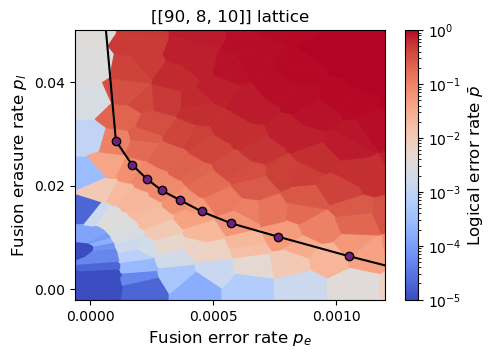

In [11]:
zdata = ((err_rates_grid[1] >= 10**-5) * err_rates_grid[1]) 
new_zdata = np.array(zdata.reshape(zdata.shape[0]*zdata.shape[1])).T

new_lines_data = (np.array([n90_err_rate_list.reshape(n90_err_rate_list.shape[0]*n90_err_rate_list.shape[1])]).T).reshape(-1)

new_zdata_all = np.hstack([new_zdata, new_lines_data])

new_zdata_all_no_zero = [10**-5 if x == 0 else x for x in new_zdata_all]
norm = LogNorm(vmin=1e-5, vmax=1)  # Set vmin and vmax to reflect the data range
mapper = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)


# add 4 distant dummy points
points = np.append(new_coords, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
vor = Voronoi(points)

fig, ax = plt.subplots(figsize=(5,3.5))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False,show_edges=False,
                line_colors="white", line_width=0.1,line_alpha=0.1)

for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(new_zdata_all_no_zero[r]))
        
tick_positions = np.linspace(0, 1, num=7)
tick_positions_y = np.linspace(0, 1, num=6)

plt.xticks(tick_positions, labels=[f'{x*max_err_grid:.4f}' for x in tick_positions])  
plt.yticks(tick_positions_y, labels=[f'{y*max_loss_grid:.2f}' for y in tick_positions_y])

plt.xlim(0,0.4)
plt.ylim(0,0.5)

cbar = plt.colorbar(mapper)
cbar.set_ticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])  # Set tick positions for log scale
cbar.set_ticklabels([r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'], fontsize=10)
cbar.set_label(r'Logical error rate $\bar{p}$',fontsize=12)


ax.set_xlabel(r'Fusion error rate $p_e$',fontsize=12)
ax.set_ylabel(r'Fusion erasure rate $p_l$',fontsize=12)
ax.set_title(f"[[90, 8, 10]] lattice",fontsize=12)

x, y = zip(*pt_noise_scaled[1])
ax.plot(x,y,marker="o",color="black", mec="black",mfc=colors_list[1])
# plt.savefig("90_erasure_vs_error.png",bbox_inches='tight', dpi=200)

C:\Users\wg22320\AppData\Local\Temp\ipykernel_21740\1066742431.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mapper)


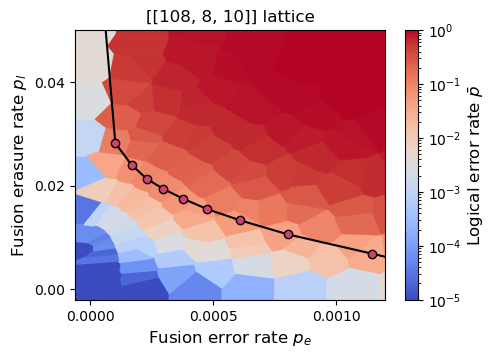

In [12]:
zdata = ((err_rates_grid[2] >= 10**-5) * err_rates_grid[2]) 
new_zdata = np.array(zdata.reshape(zdata.shape[0]*zdata.shape[1])).T

new_lines_data = (np.array([n108_err_rate_list.reshape(n108_err_rate_list.shape[0]*n108_err_rate_list.shape[1])]).T).reshape(-1)

new_zdata_all = np.hstack([new_zdata, new_lines_data])

new_zdata_all_no_zero = [10**-5 if x == 0 else x for x in new_zdata_all]
norm = LogNorm(vmin=1e-5, vmax=1)  # Set vmin and vmax to reflect the data range
mapper = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)


# add 4 distant dummy points
points = np.append(new_coords, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
vor = Voronoi(points)

fig, ax = plt.subplots(figsize=(5,3.5))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False,show_edges=False,
                line_colors="white", line_width=0.1,line_alpha=0.1)

for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(new_zdata_all_no_zero[r]))
        
tick_positions = np.linspace(0, 1, num=7)
tick_positions_y = np.linspace(0, 1, num=6)

plt.xticks(tick_positions, labels=[f'{x*max_err_grid:.4f}' for x in tick_positions])  
plt.yticks(tick_positions_y, labels=[f'{y*max_loss_grid:.2f}' for y in tick_positions_y])


plt.xlim(0,0.4)
plt.ylim(0,0.5)

cbar = plt.colorbar(mapper)
cbar.set_ticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])  # Set tick positions for log scale
cbar.set_ticklabels([r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'], fontsize=10)
cbar.set_label(r'Logical error rate $\bar{p}$',fontsize=12)


ax.set_xlabel(r'Fusion error rate $p_e$',fontsize=12)
ax.set_ylabel(r'Fusion erasure rate $p_l$',fontsize=12)
ax.set_title(f"[[108, 8, 10]] lattice",fontsize=12)

x, y = zip(*pt_noise_scaled[2])
ax.plot(x,y,marker="o",color="black", mec="black",mfc=colors_list[2])
# plt.savefig("108_erasure_vs_error.png",bbox_inches='tight', dpi=200)

C:\Users\wg22320\AppData\Local\Temp\ipykernel_21740\1596410846.py:40: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(mapper)


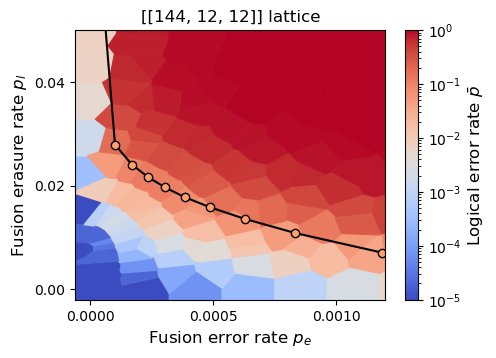

In [13]:
zdata = ((err_rates_grid[3] >= 10**-5) * err_rates_grid[3]) 
new_zdata = np.array(zdata.reshape(zdata.shape[0]*zdata.shape[1])).T

new_lines_data = (np.array([n144_err_rate_list.reshape(n144_err_rate_list.shape[0]*n144_err_rate_list.shape[1])]).T).reshape(-1)

new_zdata_all = np.hstack([new_zdata, new_lines_data])

new_zdata_all_no_zero = [10**-5 if x == 0 else x for x in new_zdata_all]
norm = LogNorm(vmin=1e-5, vmax=1)  # Set vmin and vmax to reflect the data range
mapper = cm.ScalarMappable(norm=norm, cmap=cm.coolwarm)


# add 4 distant dummy points
points = np.append(new_coords, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)
vor = Voronoi(points)

fig, ax = plt.subplots(figsize=(5,3.5))
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False,show_edges=False,
                line_colors="white", line_width=0.1,line_alpha=0.1)

for r in range(len(vor.point_region)):
    region = vor.regions[vor.point_region[r]]
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(new_zdata_all_no_zero[r]))
        
tick_positions = np.linspace(0, 1, num=7)
tick_positions_y = np.linspace(0, 1, num=6)

plt.xticks(tick_positions, labels=[f'{x*max_err_grid:.4f}' for x in tick_positions])  
plt.yticks(tick_positions_y, labels=[f'{y*max_loss_grid:.2f}' for y in tick_positions_y])

plt.xlim(0,0.4)
plt.ylim(0,0.5)

cbar = plt.colorbar(mapper)
cbar.set_ticks([1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0])  # Set tick positions for log scale
cbar.set_ticklabels([r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$', r'$10^0$'], fontsize=10)
cbar.set_label(r'Logical error rate $\bar{p}$',fontsize=12)


ax.set_xlabel(r'Fusion error rate $p_e$',fontsize=12)
ax.set_ylabel(r'Fusion erasure rate $p_l$',fontsize=12)
ax.set_title(f"[[144, 12, 12]] lattice",fontsize=12)

x, y = zip(*pt_noise_scaled[3])
ax.plot(x,y,marker="o",color="black", mec="black",mfc=colors_list[3])
# plt.savefig("144_erasure_vs_error.png",bbox_inches='tight', dpi=200)